In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [68]:
data = pd.read_csv('C:/Users/Selam/Desktop/Cogent_capstone/archive/dataset.csv')

This dataset contains the following restaurant data scraped from Tripadvisor:

ID_TA - uniquie restaurant ID

name - name of the restaurant

closed - 1 if there's a 'closed' mark on the restaurant's page

inactive - 1 if the page of the restaurant does not exist on Nov 2020

name_changed - 1 if the name of restaurant was changed (if this occured we will get redirect to the new restaurant page)

rating - star rating of the restaurant

claimed - 1 if there's a "claimed" badge on the restaurant's page

primary_cus - primary cuisine of the restaurant

city - city of the restaurant

cuisines - list of cuisines available in restaurant

special_diets - list of special diets available in restaurant

pricing - pricing rank of the restaurant

rank - rank of the restaurant in the city

city_rest_count - number of restaurants in the city (and thus in rank)

is_website - 1 if there's a link to the restaurant's website

photo_count - number of photos of restaurant

is_video - 1 if there's a video about the restaurant on its page

cus_rest_rank - rank of the restaurant in its primary cuisine

cus_rest_count - number of restaurants participating in above ranking

address - address of restaurant

mail - if there's an e-mail of restaurant specified

tel - phone number of restaurant

review_number - number of reviews of restaurant

reviews - list of several last reviews text (in English)

review_dates - dates of these reviews (including ones not in English)

review_ratings - rating of these reviews

and 28. origurl and URLTA - urls of restaurant, will be different if there was a redirect between them

The aim of this analysis is to predict the rating of the restaurants and find the variables/factors that have high influence in the rating of restaurants. The questions I have that I wanted to be answered by this analysis are:
1. How do types of cuisine affect the rating of restaurants? Which cuisine is the most famous? Does being famous mean better rating? 
2. Does having multiple types of cuisine in a restaurant have an effect on the rating? Does rating increase or decrease with the number of cuisines a restaurant has.  
3. Does having special diet and how many types are there increase or decrease rating
4. What is the relationship between price ranking and rating?
5. How are the restaurants distributed geographically? Which city has the most restaurants?  
6. How does number of restaurants in a city related to ranking? 
7. How does having a website affect rating? 
8. What is the relation between count of photo in the restaurants website vis rating
9. Which restuarants have the highest rating and why? Do they have some common characteristics or the rating is related to their number.   

In [69]:
data.shape

(103441, 28)

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103441 entries, 0 to 103440
Data columns (total 28 columns):
ID_TA              102949 non-null object
name               102885 non-null object
closed             102885 non-null float64
inactive           103441 non-null int64
name_changed       103441 non-null int64
rating             103375 non-null object
claimed            102862 non-null float64
primary_cus        102949 non-null object
city               98253 non-null object
cuisines           64331 non-null object
special_diets      14954 non-null object
pricing            45345 non-null object
rank               88792 non-null float64
city_rest_count    88792 non-null float64
is_website         102949 non-null float64
photo_count        102949 non-null float64
is_video           102949 non-null float64
cus_rest_rank      52721 non-null float64
cus_rest_count     52721 non-null float64
address            102883 non-null object
mail               102949 non-null float64
tel    

Droping column that we are not going to use. 
Dropping closed and inactive variables because they only have zeros. Orig_url and URl_TA are urls and we are not going to use them for anything.

In [71]:
#Droping column we don't use
data.drop(['closed','inactive','orig_url','URL_TA','tel','address','reviews','review_ratings','cus_rest_count'],axis= 1, inplace= True)

In [72]:
#changing data type
data1=data[['name_changed','claimed','pricing','is_website','is_video','mail']].apply(lambda x: x.astype('category'))

In [73]:
pd.set_option('display.max_columns', None)

In [74]:
data1.dtypes

name_changed    category
claimed         category
pricing         category
is_website      category
is_video        category
mail            category
dtype: object

In [75]:
#droping old cloumn that so that we can add the new once with the right data type
data.drop(['name_changed','claimed','pricing','is_website','is_video','mail'],axis=1,inplace=True)
data2=pd.concat([data,data1], axis=1)

In [76]:
data2.dtypes

ID_TA                object
name                 object
rating               object
primary_cus          object
city                 object
cuisines             object
special_diets        object
rank                float64
city_rest_count     float64
photo_count         float64
cus_rest_rank       float64
review_number         int64
review_dates         object
name_changed       category
claimed            category
pricing            category
is_website         category
is_video           category
mail               category
dtype: object

Checking for missing values

In [77]:
data2.isna().sum()

ID_TA                492
name                 556
rating                66
primary_cus          492
city                5188
cuisines           39110
special_diets      88487
rank               14649
city_rest_count    14649
photo_count          492
cus_rest_rank      50720
review_number          0
review_dates        2333
name_changed           0
claimed              579
pricing            58096
is_website           492
is_video             492
mail                 492
dtype: int64

There are missing values in the dataset. I will replace them with mean and mode, and build the model. 

In [78]:
#numerical variables
#replacing missing values of numerical variables with mean
[['rank','city_rest_count','photo_count','cus_rest_rank','cus_rest_count','review_number']]

data3= data2[['rank','city_rest_count','photo_count','cus_rest_rank','review_number']] = data2[['rank','city_rest_count','photo_count','cus_rest_rank','review_number']].fillna(data2[['rank','city_rest_count','photo_count','cus_rest_rank','review_number']].mean())

In [79]:
data3.isna().sum()

rank               0
city_rest_count    0
photo_count        0
cus_rest_rank      0
review_number      0
dtype: int64

In [80]:
#replacing missing values of the categorical with mode
data0=data2[['name','rating','pricing','primary_cus','city','cuisines','special_diets','name_changed','claimed','is_website','is_video','mail']]

In [81]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103441 entries, 0 to 103440
Data columns (total 12 columns):
name             102885 non-null object
rating           103375 non-null object
pricing          45345 non-null category
primary_cus      102949 non-null object
city             98253 non-null object
cuisines         64331 non-null object
special_diets    14954 non-null object
name_changed     103441 non-null category
claimed          102862 non-null category
is_website       102949 non-null category
is_video         102949 non-null category
mail             102949 non-null category
dtypes: category(6), object(6)
memory usage: 5.3+ MB


In [82]:
data_mode= data0.mode()
data_mode

,name,rating,pricing,primary_cus,city,cuisines,special_diets,name_changed,claimed,is_website,is_video,mail
0,Starbucks,4.0,$$ - $$$,Unknown,Seoul,Japanese,Vegetarian Friendly,0,0.0,0.0,0.0,0.0


In [83]:
(data0['primary_cus'].value_counts()).head(5)

Unknown     41717
Japanese     8377
French       7478
Italian      5962
Cafe         4524
Name: primary_cus, dtype: int64

In [84]:
data0['primary_cus'] = data0['primary_cus'].replace('Unknown','Japanese')
data0['primary_cus'] = data0['primary_cus'].replace(np.nan,'Japanese')

C:\Users\Selam\Anaconda31\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Selam\Anaconda31\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [85]:
(data0['primary_cus'].value_counts()).head(5)

Japanese    50586
French       7478
Italian      5962
Cafe         4524
Bar          3287
Name: primary_cus, dtype: int64

In [86]:
data0.fillna({'name':'Starbucks','rating':'4.0','pricing':'$', 'city':'Seoul','cuisines':'Japanese','special_diets':'Vegetarian Friendly','is_video':0,'claimed':0,'is_website':0,'mail':0},inplace= True)

C:\Users\Selam\Anaconda31\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [87]:
data0.head(3)

,name,rating,pricing,primary_cus,city,cuisines,special_diets,name_changed,claimed,is_website,is_video,mail
0,Pizza School,4.0,$,Japanese,Seoul,Japanese,Vegetarian Friendly,0,0.0,0.0,0.0,0.0
1,Pujimi Tripes,4.5,$,Japanese,Seoul,Japanese,Vegetarian Friendly,0,0.0,0.0,0.0,0.0
2,Bangung,4.5,$,Japanese,Seoul,Japanese,Vegetarian Friendly,0,0.0,0.0,0.0,0.0


In [88]:
data0.isna().sum()

name             0
rating           0
pricing          0
primary_cus      0
city             0
cuisines         0
special_diets    0
name_changed     0
claimed          0
is_website       0
is_video         0
mail             0
dtype: int64

In [89]:
df4=pd.concat([data0,data3], axis=1)

In [90]:
df4.isna().sum()

name               0
rating             0
pricing            0
primary_cus        0
city               0
cuisines           0
special_diets      0
name_changed       0
claimed            0
is_website         0
is_video           0
mail               0
rank               0
city_rest_count    0
photo_count        0
cus_rest_rank      0
review_number      0
dtype: int64

In [91]:
df4.shape

(103441, 17)

In [92]:
df4['rating'].unique()

array(['4.0', '4.5', '2.0', '3.5', '5.0', '2.5', '3.0', '1.0',
       '3.5 of 5 bubbles', '1.5', '5.0 of 5 bubbles', '4.0 of 5 bubbles',
       '4.5 of 5 bubbles', '3.0 of 5 bubbles', '1.0 of 5 bubbles',
       '2.0 of 5 bubbles', '2.5 of 5 bubbles', '0.0'], dtype=object)

In [93]:
#getting the rating with out the word bubbles
ratings =[]
for i in df4['rating']:
    ratings.append(i[0:3])

In [94]:
df4 = df4.assign(ratings= ratings)

In [95]:
df4.drop(['rating'],axis=1,inplace=True)

In [96]:
df4['ratings'].unique()

array(['4.0', '4.5', '2.0', '3.5', '5.0', '2.5', '3.0', '1.0', '1.5',
       '0.0'], dtype=object)

In [97]:
df4.head(3)

,name,pricing,primary_cus,city,cuisines,special_diets,name_changed,claimed,is_website,is_video,mail,rank,city_rest_count,photo_count,cus_rest_rank,review_number,ratings
0,Pizza School,$,Japanese,Seoul,Japanese,Vegetarian Friendly,0,0.0,0.0,0.0,0.0,19149.0,26501.0,0.0,1262.660629,1,4.0
1,Pujimi Tripes,$,Japanese,Seoul,Japanese,Vegetarian Friendly,0,0.0,0.0,0.0,0.0,4600.0,26501.0,0.0,1262.660629,3,4.5
2,Bangung,$,Japanese,Seoul,Japanese,Vegetarian Friendly,0,0.0,0.0,0.0,0.0,2766.0,26501.0,1.0,1262.660629,5,4.5


#### Which cuisine is the most famous? Does being famous mean better rating?

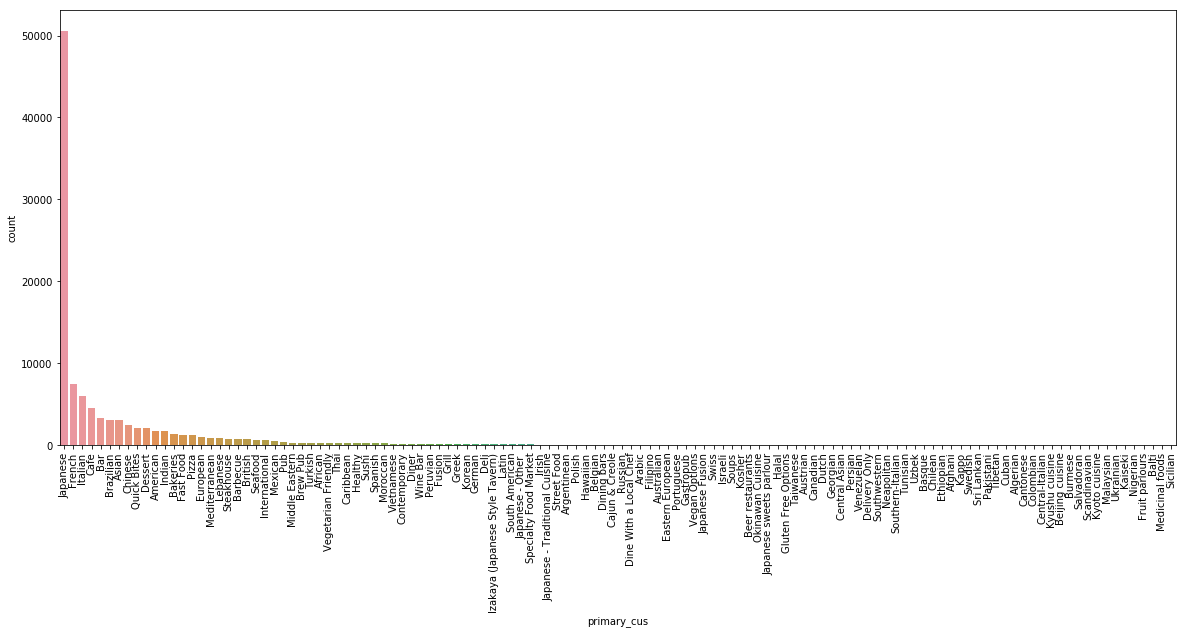

In [98]:
plt.figure(figsize = (20,8))
plt.xticks(rotation=90)
sns.countplot(x = 'primary_cus',
              data = df4,
              order = df4['primary_cus'].value_counts().index)
plt.show()

The top Ten famous cusines are Japanese, French, Italian, Cafe, Bar, Brazilian, Asian, Chinese, Quick Bites and Dessert respectively.

Next, let's take the mean of rating of each cusine and see how they rank. 

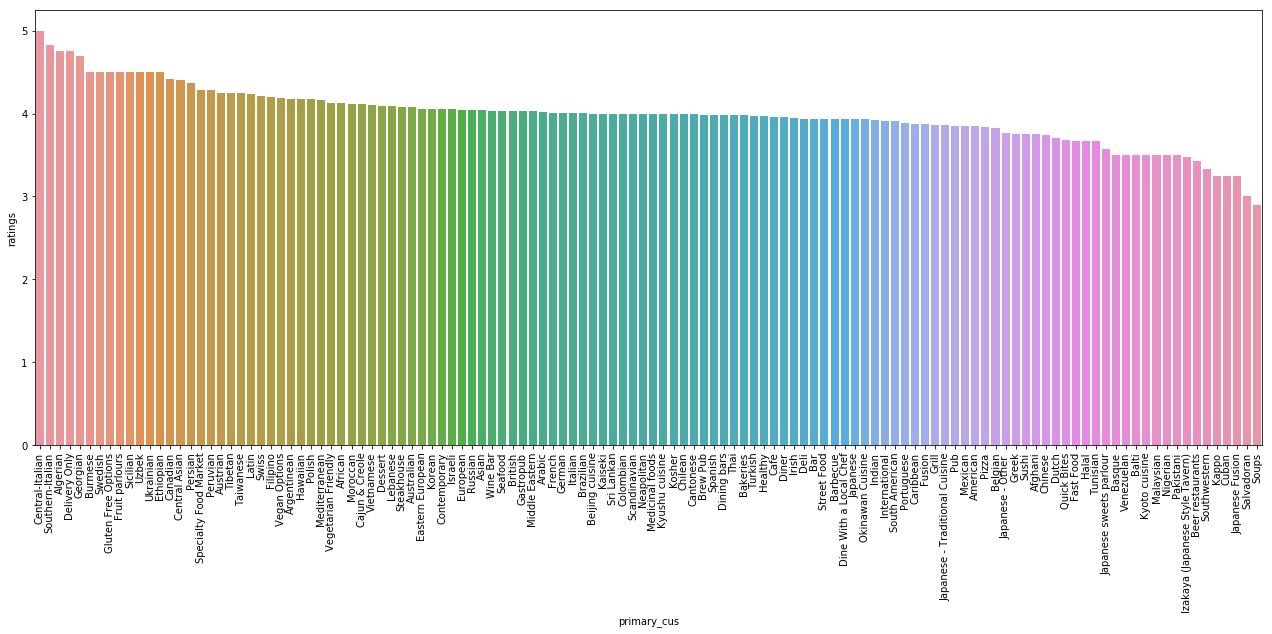

In [33]:
#Adding the rating to see which type of cusines have the highest sum of raitings
#avg for each cusines
df4['ratings']= df4['ratings'].apply(pd.to_numeric)
pri_cus_rating = df4.groupby('primary_cus',as_index=False)['ratings'].mean().sort_values('ratings', ascending=False)
pri_cus_rating.head(10)
plt.figure(figsize = (22,8))
plt.xticks(rotation=90)

sns.barplot(x= pri_cus_rating['primary_cus'],y= pri_cus_rating['ratings'])
plt.show()

In [34]:
pri_cus_rating.head(10)

,primary_cus,ratings
27,Central-Italian,5.000000
100,Southern-Italian,4.833333
2,Algerian,4.750000
34,Delivery Only,4.750000
49,Georgian,4.700000
20,Burmese,4.500000
108,Swedish,4.500000
51,Gluten Free Options,4.500000
46,Fruit parlours,4.500000
97,Sicilian,4.500000


The range of mean of rating by primary cuisines is between 5 and 3. Overall Central Italian has the highest mean rating from all the cuisines. Southern Italian have the second highest mean rating. Algerian, Restaurants have delivery only and Georgian have second highest mean rating. Burmese,Swedish, Restuarants with Gluten free options, fruit parlours and Sicilian have the thrid heighest mean rating. This tells us most frequent cuisines doesn't mean they have better rating. 

### Rating Distribution 

In [35]:
df4['ratings'].unique()

array([4. , 4.5, 2. , 3.5, 5. , 2.5, 3. , 1. , 1.5, 0. ])

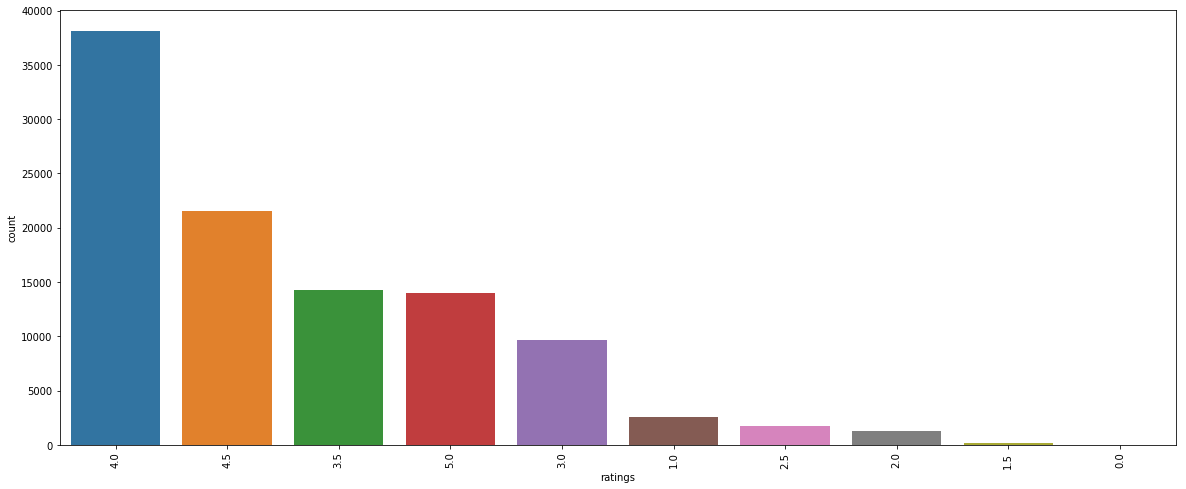

In [36]:
#Most the rates are 4 and 4.5
plt.figure(figsize = (20,8))
plt.xticks(rotation=90)
sns.countplot(x = 'ratings',
              data = df4,
              order = df4['ratings'].value_counts().index)
plt.show()

The unqiue values of our target variable (Rating) are ['4.5', '4.0', '3.5', '3.0', '5.0', '2.0', '2.5', '1.0'].
As we can see below, we have unbalanced target variable. 

#### Does having multiple types of cuisine in a restaurant have an effect on the rating? Does rating increase or decrease with the number of cuisines a restaurant has.

In [37]:
df4['count_cusines'] = df4['cuisines'].str.count(',')+1

In [38]:
num_cus_mean_raitng = df4.groupby('count_cusines',as_index=False)['ratings'].mean().sort_values('ratings', ascending=False)
num_cus_mean_raitng

,count_cusines,ratings
9,10,4.500000
11,12,4.500000
12,13,4.500000
7,8,4.380000
8,9,4.361111
6,7,4.091892
5,6,4.047401
3,4,4.028714
4,5,4.022139
10,11,4.000000


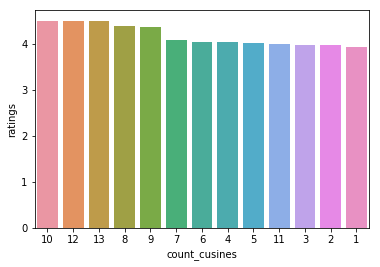

In [39]:
sns.barplot(x='count_cusines',
            y="ratings", data=num_cus_mean_raitng,
            order=num_cus_mean_raitng.sort_values('ratings',ascending = False).count_cusines)

The restaurants that have 10 or 12 or 13 or 8 or 9 number of cusines have better average ratings. I will add the number of cuisines a restaurant have to the dataset to see if it can be one of the predictors. 

### Does having multiple special diet increase or decrease rating?

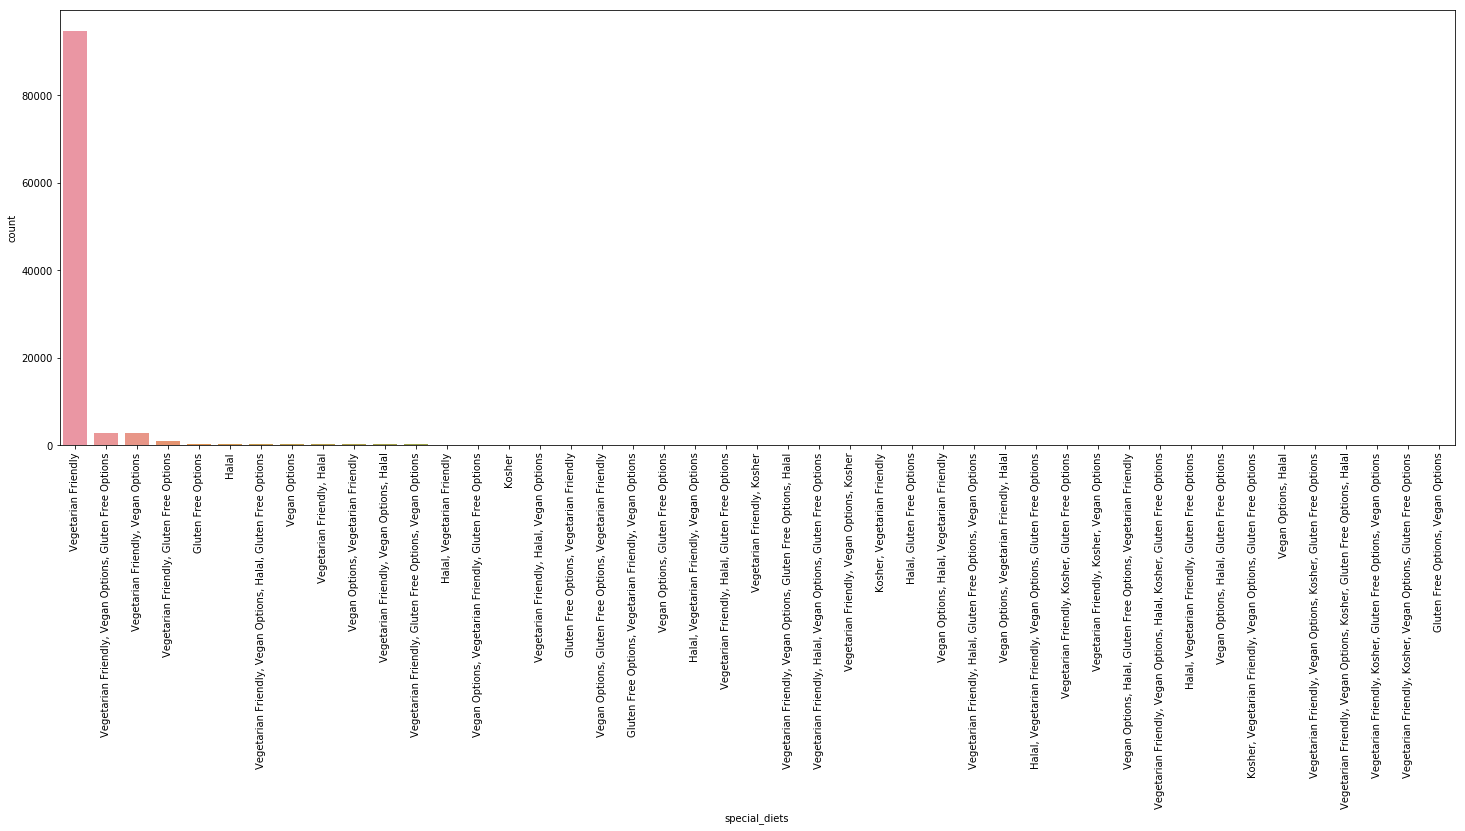

In [40]:
df4['special_diets']
plt.figure(figsize = (25,8))
plt.xticks(rotation=90)
sns.countplot(x = 'special_diets',
              data = df4,
              order = df4['special_diets'].value_counts().index,)
plt.show()

Most restaurants have only vegetarian friendly option. 

C:\Users\Selam\Anaconda31\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


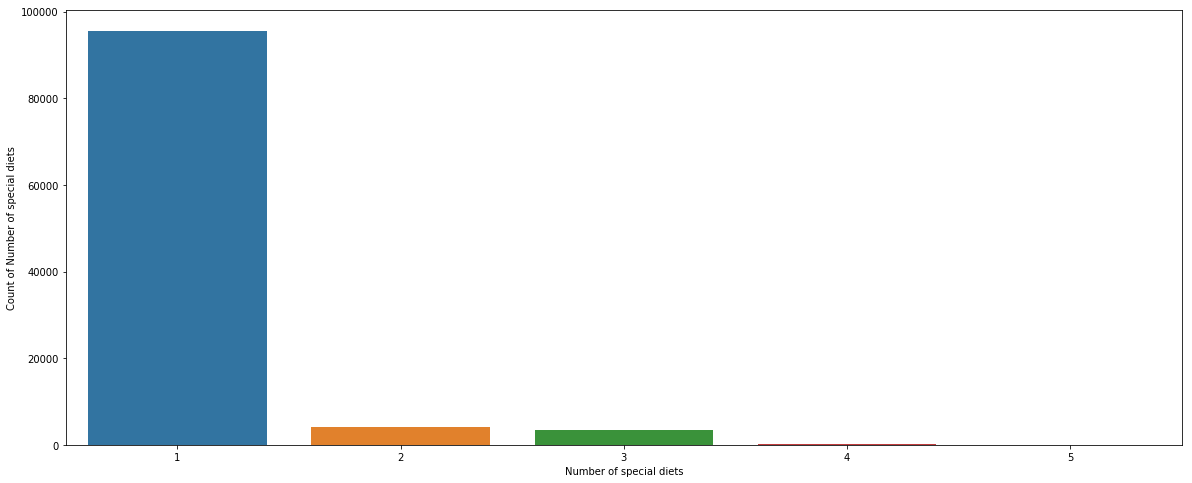

In [41]:
#let see the counts of special diets in the dataset 
count_s_diets = df4['special_diets'].str.count(',')+1
plt.figure(figsize = (20,8))
sns.countplot(count_s_diets)
plt.xlabel('Number of special diets')
plt.ylabel('Count of Number of special diets')
plt.show()

Most of the restaurants have one type of special diets 

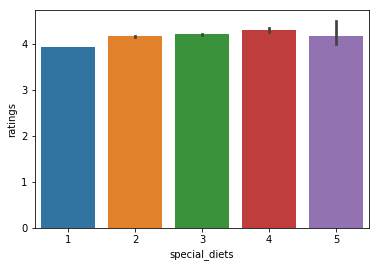

In [42]:
sns.barplot(y=df4['ratings'],
            x= count_s_diets)
plt.show()

Between the numbers of 1 and 4 the average rating is increasing. Decreased little bit in number 5. This shows us the number of special diets a restaurant have might affect rating.  

### How are the restaurants distributed geographically? Which city has the most restaurants?  

C:\Users\Selam\Anaconda31\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


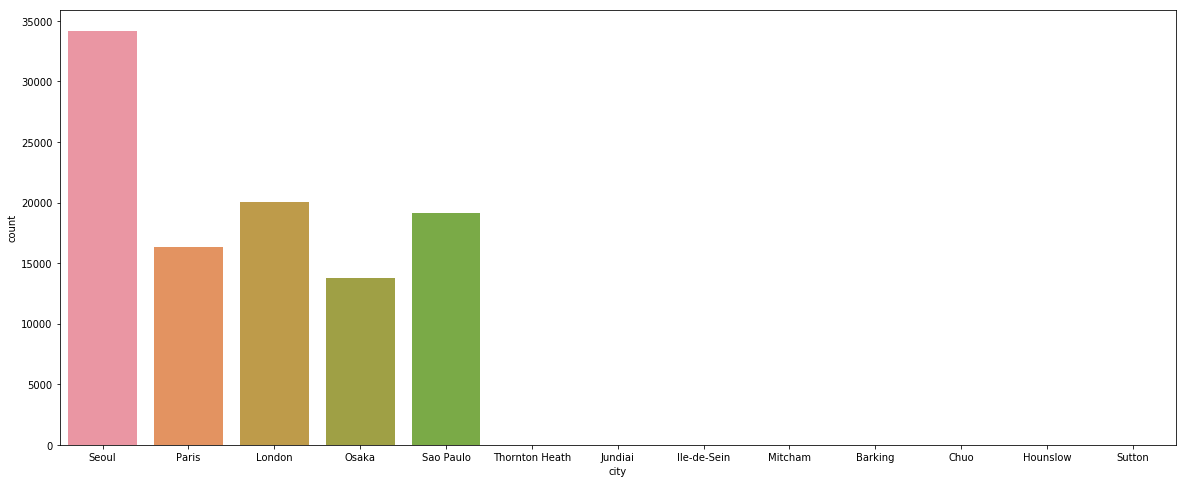

In [43]:
plt.figure(figsize = (20,8))
sns.countplot(df4['city'])
plt.show()

There are 13 cities in total. Most of the restaurants are in Seoul. 

### How does restaurants by city related to rating? 

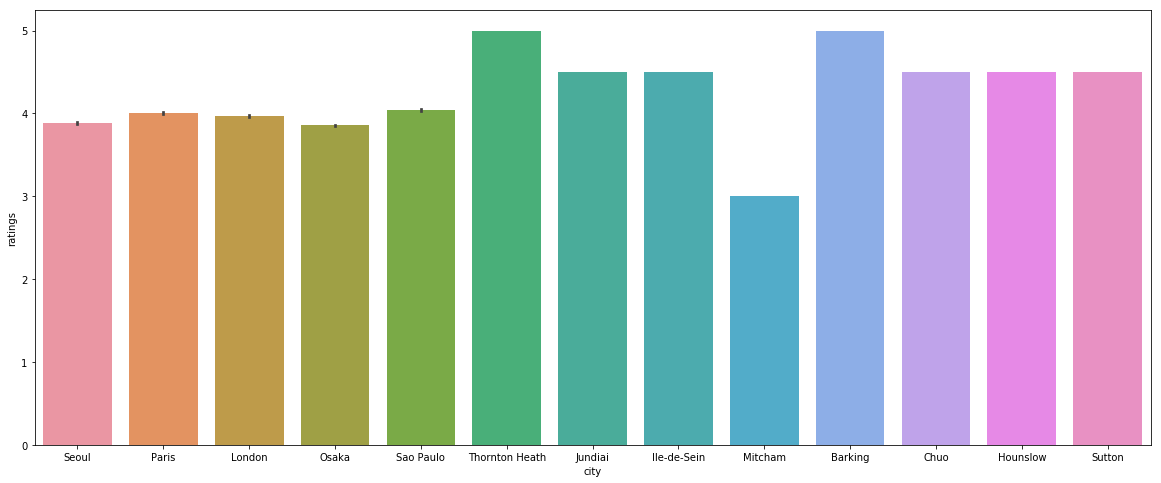

In [44]:
plt.figure(figsize = (20,8))
sns.barplot(y=df4['ratings'],
            x= df4['city'])
plt.show()

Thornton heath and Barking have the highest average ratings. Jundia city, Lie-de-Sein, Chuo, Hounslow and Sutton have the second highest average ratings. Sao Paulo and Paris have the highest average ratings. Seoul have the highest number of restaurants but it doesn't have the highest average ratings. 

### How does number of restaurants in a city related to ranking? 

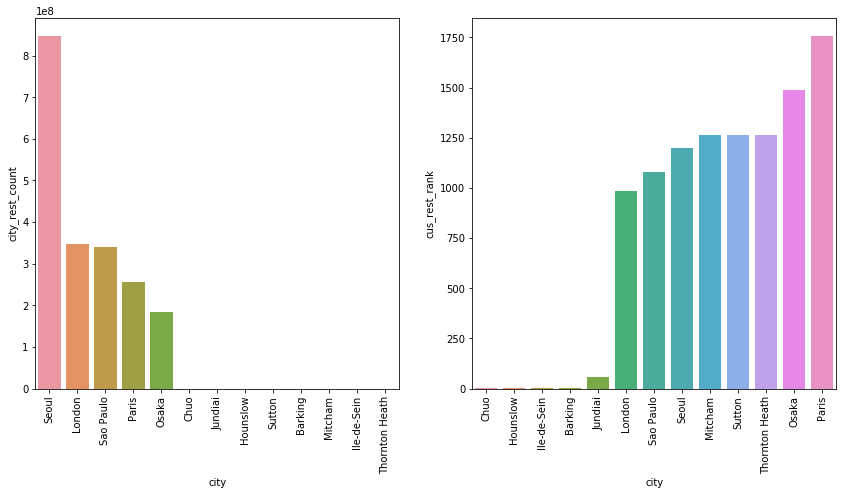

In [45]:
cust_sum= df4.groupby('city',as_index=False)['city_rest_count'].sum().sort_values('city_rest_count', ascending=False)
plt.figure(figsize = (30,15))
ax1 = plt.subplot2grid((2,4),(0,1))
sns.barplot(x='city', y='city_rest_count',data=cust_sum)
plt.xticks(rotation=90)

cust_rank_mean= df4.groupby('city',as_index=False)['cus_rest_rank'].mean().sort_values('cus_rest_rank', ascending=True)
ax1 = plt.subplot2grid((2,4),(0,2))
sns.barplot( x='city',y ='cus_rest_rank',data=cust_rank_mean)
plt.xticks(rotation=90)
plt.show()

The graph on the right is showing the count of restaurants that participated in the average ranking by primary cuisine. Most of the restaurants that participated are in Seoul, london, Sao Paulo, Paris and Osaka. If we see their ranking in the graph in the left side, London have better average ranking from the six main cities above. Sao paulo, Seoul, Osaka and Paris follows after London respectivily.

### How does having a website affect rating?


C:\Users\Selam\Anaconda31\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


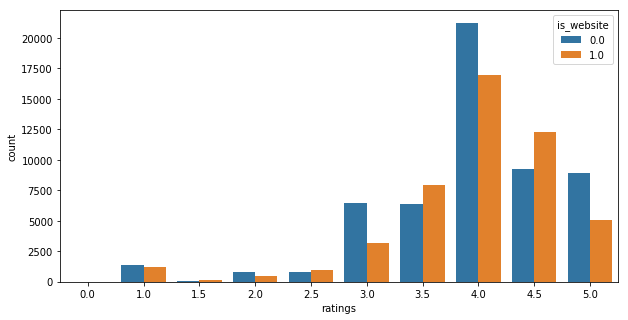

In [46]:
plt.figure(figsize = (10,5))
sns.countplot(df4['ratings'], hue= df4['is_website'])
plt.show()

Most restaurants have 3 and above ratings. More restaurants that have 3.5 and 4.5 ratings have website than those do not. More restaurants that have 4  and 5 ratings do not have websites than those who do. This is showing us we can't conclude that having website can increase or decrease ratings but it is something to look at closely. We will know the how much the contribution of website is once we run feature importance. 

### What is the relation between count of photo in the restaurants website vis rating

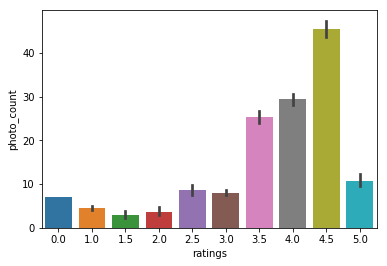

In [47]:
sns.barplot(x='ratings',y='photo_count', data=df4)
plt.show()


Those restaurants which have 4, 4.5 and 3.5 ratings have higher average photo counts than the other ratings. 

### What is the mean percentage of Rating in each price category

In [102]:
df4['pricing'] = df4['pricing'].replace('$','Cheap')
df4['pricing'] = df4['pricing'].replace('$$ - $$$','Medium')
df4['pricing'] = df4['pricing'].replace('$$$$','Expensive')

In [113]:
df4['ratings']=df4['ratings'].astype(float)
pie_price= df4.groupby('pricing')['ratings'].mean()
pie_price

pricing
Cheap        3.931266
Expensive    4.089794
Medium       3.969355
Name: ratings, dtype: float64

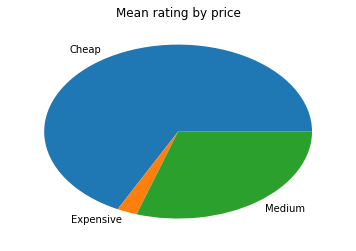

In [111]:
df4['ratings']=df4['ratings'].astype(float)
pie_price= df4.groupby('pricing')['ratings'].count()
pie_price.plot.pie()
plt.ylabel('')
plt.title("Mean rating by price")
plt.show()

In [116]:
df4.to_csv (r'C:\Users\Selam\Desktop\export_dataframe.csv', index = False, header=True)

### Which restuarants have the highest rating and why? Do they have some common characteristics or the rating is related to how many times they exist in the dataset.

In [49]:
#sum
df4['ratings'] = df4['ratings'].astype(float)
df3= df4.groupby('name',as_index = False)[['ratings']].sum().sort_values(by='ratings',ascending= False)
df3.head(10)

,name,ratings
73442,Starbucks,3066.5
33605,Idiya Coffee,731.5
50552,McDonald's,572.5
17728,Coffee Bean,473.5
10936,Burger King,472.0
74220,Subway,417.0
11490,Cacau Show,414.5
28600,Gongcha,400.5
63340,Pret A Manger,389.5
6471,Baskin Robbins 31,379.0


In [50]:
#count
d= df4['name'].value_counts()
d_sorted=d.sort_values(ascending=False)
d_sorted.head(10)

Starbucks         755
McDonald's        194
Idiya Coffee      183
Burger King       151
Subway            128
Coffee Bean       118
Domino's Pizza    107
Gongcha            98
Cacau Show         97
Pret A Manger      96
Name: name, dtype: int64

In [51]:
#mean
df5= df4[['name','ratings','review_number']]
new = df5.groupby(['name']).agg({'ratings': ['mean','sum'],'name':['count'],'review_number':['sum']}).reset_index()
new.columns = ['name', 'ratings','sum_ratings', 'count','sum_reviews']
sorted_new= new.sort_values(by=['ratings','sum_reviews'],ascending= False)
sorted_new.head(10)

,name,ratings,sum_ratings,count,sum_reviews
76578,TasteIT Restaurante,5.0,5.0,1,997
873,ASPIC,5.0,5.0,1,980
53853,My Tortellini,5.0,5.0,1,980
31156,Hard Rock Cafe Piccadilly Circus,5.0,5.0,1,965
30070,HUB Food Art & Lounge,5.0,5.0,1,963
31473,Hebe,5.0,5.0,1,942
22864,E Pellicci,5.0,5.0,1,923
78736,The Golden Chippy,5.0,5.0,1,906
61910,Pizza Union Spitalfields,5.0,5.0,1,901
50496,Mayfair Garden,5.0,5.0,1,888


Starbucks, lidya coffe and McDonald's have the highest sum of ratings. If we we see the counts of restaurants in the data set these three are the top three in the dataset. So having highest sum of ratings could be due to their count.
when we take mean of ratings TasteIT Restaurante, ASPIC, My Tortellini have the highest mean ratings with highest number of reviews. I order the resturants by sum number of reviews as well because the mean of the rating is more reliable when we have more number of reviews. Another things we notice from the above table is these restaurants only exists once. They don't have mutiple locations or chain. 

### Which cusines of which restaurants have the best ranks?

In [52]:
#First ranks of restaurants based on their primary cuisine
cus_rank_1 = df4[df4['cus_rest_rank']==1]
cus_rank_rest= cus_rank_1.groupby(['primary_cus','name'])['cus_rest_rank'].count().sort_values(ascending = False)
cus_rank_rest.head(20)

primary_cus             name                                    
Turkish                 Turkish & Mediterranean Restaurant Mezze    2
Fast Food               Kyochon Chicken Dongdaemun 1                1
Chinese                 Gogoichi Horai JR Shin Osaka Station        1
                        Jonny Dumpling                              1
Dessert                 Bacio di Latte                              1
                        Crepes & Shakes                             1
                        La Crêperie                                 1
                        maidreamin, Osaka Namba                     1
Dine With a Local Chef  Arcelia of Queen of Cacao                   1
                        Jean Yves of Chef Jean-Yves' Table          1
                        Jhenn of the Vegan Ronin                    1
Dutch                   De Hems Dutch Cafe Bar                      1
Filipino                RAPSA                                       1
Caribbean               L

Turkish, Fast Food, Chinese,Dessert and Dine with a local Cheft are some of the primary cuisines that have ranked first. 

### What is the relationship between rank and rating?

C:\Users\Selam\Anaconda31\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


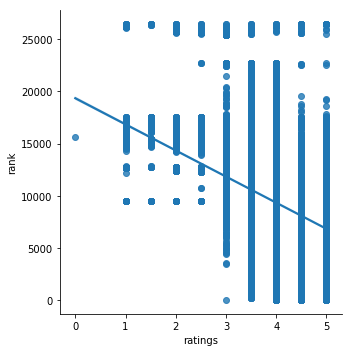

In [53]:
#Rating and rank
sns.lmplot('ratings','rank',data=df4)

Rating and Rank have negative relationship

In [ ]:
plt.figure(figsize = (15,7))
ax1 = plt.subplot2grid((2,4),(0,0))
sns.countplot(df4['is_video'])
ax1 = plt.subplot2grid((2,4),(0,1))
sns.countplot(df4['name_changed'])
ax1 = plt.subplot2grid((2,4),(0,2))
sns.countplot(df4['mail'])
plt.show()

 Very few of the websites have video and mail in their website, and changed their name.

In [56]:
#droping name and review date because we are not going to use it for modeling
df4.drop('name','review_dates',axis=1,inplace= True)

we need to group the variable that need encoding to avoid curse of dimensionality when we onehot encode our non numeric variables

In [57]:
df4['primary_cus'].unique()

array(['Japanese', 'Asian', 'French', 'Cafe', 'Italian', 'Bakeries',
       'Barbecue', 'Brazilian', 'International', 'Bar', 'Lebanese',
       'American', 'Steakhouse', 'British', 'Dessert', 'Mexican',
       'European', 'Thai', 'Fast Food', 'Pub', 'Chinese', 'Indian',
       'Seafood', 'Healthy', 'Greek', 'Wine Bar', 'Moroccan',
       'Quick Bites', 'Mediterranean', 'Sicilian', 'Cajun & Creole',
       'Diner', 'Vegetarian Friendly', 'Contemporary', 'Korean',
       'Middle Eastern', 'Irish', 'German', 'Peruvian', 'Filipino',
       'Deli', 'Pizza', 'Caribbean', 'African', 'Arabic', 'Polish',
       'Turkish', 'Vietnamese', 'Australian', 'Sushi', 'Brew Pub',
       'Argentinean', 'Fusion', 'South American', 'Portuguese', 'Belgian',
       'Grill', 'Latin', 'Spanish', 'Specialty Food Market',
       'Japanese - Other ', 'Japanese Fusion', 'Uzbek',
       'Dine With a Local Chef', 'Street Food', 'Hawaiian', 'Israeli',
       'Georgian', 'Russian', 'Dining bars', 'Central Asian', 'Tibe

In [58]:
pri_cus= df4['primary_cus']
pri_cus= pri_cus.replace(dict.fromkeys([ 'Asian','Lebanese','Thai','Chinese','Indian','Korean','Filipino','Vietnamese','Sushi','Japanese - Other ',
'Japanese Fusion','Uzbek','Russian','Central Asian','Tibetan','Izakaya (Japanese Style Tavern)','Okinawan Cuisine',
 'Japanese - Traditional Cuisine','Neapolitan','Kyoto cuisine','Taiwanese','Cantonese','Southwestern', 'Japanese sweets parlour',
    'Kappo','Sri Lankan','Kyushu cuisine','Persian','Balti','Afghani','Malaysian','Pakistani','Burmese','Kaiseki',0],'Asia'))

pri_cus= pri_cus.replace(dict.fromkeys([ 'Seafood','International','Contemporary','Peruvian','Caribbean','Fusion','Hawaiian',
'Medicinal foods'],'International'))

pri_cus= pri_cus.replace(dict.fromkeys([ 'French','Italian','British','European','Greek','Mediterranean','Sicilian', 'Irish','German','Polish','Turkish',
'Portuguese','Belgian','Israeli','Georgian','Austrian','Eastern European','Southern-Italian','Kosher','Swiss','Beijing cuisine',
'Ukrainian','Scandinavian','Dutch','Basque','Central-Italian','Swedish'],'Europian'))

pri_cus= pri_cus.replace(dict.fromkeys(['Moroccan','African','Ethiopian','Nigerian','Algerian','Tunisian'],'African'))

pri_cus= pri_cus.replace(dict.fromkeys( [ 'Brazilian','Mexican','Argentinean','South American','Latin','Spanish','Chilean','Colombian','Salvadoran','Cuban'],'SouthAmerican'))

pri_cus= pri_cus.replace(dict.fromkeys([ 'American','Steakhouse','Fast Food','Quick Bites','Cajun & Creole','Diner','Deli','Pizza','Grill',
'Dine With a Local Chef','Specialty Food Market','Street Food','Barbecue','Soups','Fruit parlours','Beer restaurants',
'Venezuelan','Canadian','Delivery Only','Vegan Options','Healthy','Vegetarian Friendly','Gluten Free Options'],'NorthAmerican'))

pri_cus= pri_cus.replace(dict.fromkeys(['Cafe','Bakeries','Dessert'],'cafe'))
pri_cus= pri_cus.replace(dict.fromkeys(['Bar','Pub','Wine Bar','Brew Pub','Dining bars','Gastropub'],'bar'))

pri_cus= pri_cus.replace(dict.fromkeys( ['Middle Eastern','Arabic','Halal'],'bar'))
pri_cus= pri_cus.replace(dict.fromkeys(['Australian'],'Australian'))

pri_cus.unique()

array(['Japanese', 'Asia', 'Europian', 'cafe', 'NorthAmerican',
       'SouthAmerican', 'International', 'bar', 'African', 'Australian'],
      dtype=object)

In [59]:
pri_cus.unique()

array(['Japanese', 'Asia', 'Europian', 'cafe', 'NorthAmerican',
       'SouthAmerican', 'International', 'bar', 'African', 'Australian'],
      dtype=object)

In [60]:
#droping the old primary cuisine coloumn
df4.drop('primary_cus', axis = 1, inplace = True) 

In [61]:
df4.head(4)

,pricing,city,cuisines,special_diets,name_changed,claimed,is_website,is_video,mail,rank,city_rest_count,photo_count,cus_rest_rank,review_number,ratings,count_cusines
0,$,Seoul,Japanese,Vegetarian Friendly,0,0.0,0.0,0.0,0.0,19149.0,26501.0,0.0,1262.660629,1,4.0,1
1,$,Seoul,Japanese,Vegetarian Friendly,0,0.0,0.0,0.0,0.0,4600.0,26501.0,0.0,1262.660629,3,4.5,1
2,$,Seoul,Japanese,Vegetarian Friendly,0,0.0,0.0,0.0,0.0,2766.0,26501.0,1.0,1262.660629,5,4.5,1
3,$,Seoul,"Asian, Korean",Vegetarian Friendly,0,0.0,1.0,0.0,0.0,1655.0,26501.0,4.0,659.000000,7,4.5,2


In [62]:
#adding the new catergorized by continent coloumn to the dataframe
df4= pd.concat([df4,pri_cus], axis=1)
df4

,pricing,city,cuisines,special_diets,name_changed,claimed,is_website,is_video,mail,rank,city_rest_count,photo_count,cus_rest_rank,review_number,ratings,count_cusines,primary_cus
0,$,Seoul,Japanese,Vegetarian Friendly,0,0.0,0.0,0.0,0.0,19149.000000,26501.00000,0.000000,1262.660629,1,4.0,1,Japanese
1,$,Seoul,Japanese,Vegetarian Friendly,0,0.0,0.0,0.0,0.0,4600.000000,26501.00000,0.000000,1262.660629,3,4.5,1,Japanese
2,$,Seoul,Japanese,Vegetarian Friendly,0,0.0,0.0,0.0,0.0,2766.000000,26501.00000,1.000000,1262.660629,5,4.5,1,Japanese
3,$,Seoul,"Asian, Korean",Vegetarian Friendly,0,0.0,1.0,0.0,0.0,1655.000000,26501.00000,4.000000,659.000000,7,4.5,2,Asia
4,$,Seoul,Japanese,Vegetarian Friendly,0,0.0,0.0,0.0,0.0,18486.000000,26501.00000,0.000000,1262.660629,1,4.0,1,Japanese
5,$,Seoul,Japanese,Vegetarian Friendly,0,0.0,0.0,0.0,0.0,26335.000000,26501.00000,0.000000,1262.660629,2,2.0,1,Japanese
6,$,Seoul,Japanese,Vegetarian Friendly,0,0.0,0.0,0.0,0.0,11917.000000,26501.00000,0.000000,1262.660629,2,4.0,1,Japanese
7,$,Seoul,Japanese,Vegetarian Friendly,0,0.0,0.0,0.0,0.0,18544.000000,26501.00000,0.000000,1262.660629,3,3.5,1,Japanese
8,$,Seoul,Japanese,Vegetarian Friendly,0,0.0,0.0,0.0,0.0,11879.000000,26501.00000,0.000000,1262.660629,1,5.0,1,Japanese
9,$,Seoul,Japanese,Vegetarian Friendly,0,0.0,0.0,0.0,0.0,5302.000000,26501.00000,0.000000,1262.660629,4,4.0,1,Japanese


In [63]:
#count of 57 and below categorize as other
df4['special_diets'].value_counts()

Vegetarian Friendly                                                       94756
Vegetarian Friendly, Vegan Options, Gluten Free Options                    2828
Vegetarian Friendly, Vegan Options                                         2733
Vegetarian Friendly, Gluten Free Options                                    922
Gluten Free Options                                                         315
Halal                                                                       300
Vegetarian Friendly, Vegan Options, Halal, Gluten Free Options              217
Vegan Options                                                               196
Vegetarian Friendly, Halal                                                  192
Vegan Options, Vegetarian Friendly                                          172
Vegetarian Friendly, Vegan Options, Halal                                   165
Vegetarian Friendly, Gluten Free Options, Vegan Options                     130
Halal, Vegetarian Friendly              

In [64]:
df4['special_count'] = df4.groupby(['special_diets'])["special_diets"].transform('count')
df4

,pricing,city,cuisines,special_diets,name_changed,claimed,is_website,is_video,mail,rank,city_rest_count,photo_count,cus_rest_rank,review_number,ratings,count_cusines,primary_cus,special_count
0,$,Seoul,Japanese,Vegetarian Friendly,0,0.0,0.0,0.0,0.0,19149.000000,26501.00000,0.000000,1262.660629,1,4.0,1,Japanese,94756
1,$,Seoul,Japanese,Vegetarian Friendly,0,0.0,0.0,0.0,0.0,4600.000000,26501.00000,0.000000,1262.660629,3,4.5,1,Japanese,94756
2,$,Seoul,Japanese,Vegetarian Friendly,0,0.0,0.0,0.0,0.0,2766.000000,26501.00000,1.000000,1262.660629,5,4.5,1,Japanese,94756
3,$,Seoul,"Asian, Korean",Vegetarian Friendly,0,0.0,1.0,0.0,0.0,1655.000000,26501.00000,4.000000,659.000000,7,4.5,2,Asia,94756
4,$,Seoul,Japanese,Vegetarian Friendly,0,0.0,0.0,0.0,0.0,18486.000000,26501.00000,0.000000,1262.660629,1,4.0,1,Japanese,94756
5,$,Seoul,Japanese,Vegetarian Friendly,0,0.0,0.0,0.0,0.0,26335.000000,26501.00000,0.000000,1262.660629,2,2.0,1,Japanese,94756
6,$,Seoul,Japanese,Vegetarian Friendly,0,0.0,0.0,0.0,0.0,11917.000000,26501.00000,0.000000,1262.660629,2,4.0,1,Japanese,94756
7,$,Seoul,Japanese,Vegetarian Friendly,0,0.0,0.0,0.0,0.0,18544.000000,26501.00000,0.000000,1262.660629,3,3.5,1,Japanese,94756
8,$,Seoul,Japanese,Vegetarian Friendly,0,0.0,0.0,0.0,0.0,11879.000000,26501.00000,0.000000,1262.660629,1,5.0,1,Japanese,94756
9,$,Seoul,Japanese,Vegetarian Friendly,0,0.0,0.0,0.0,0.0,5302.000000,26501.00000,0.000000,1262.660629,4,4.0,1,Japanese,94756


In [65]:
df4.loc[df4['special_count'] <= 57, 'special_diets'] = 'other'  

In [66]:
df4['special_diets'].unique()

array(['Vegetarian Friendly', 'Vegan Options',
       'Vegetarian Friendly, Vegan Options',
       'Vegetarian Friendly, Vegan Options, Gluten Free Options',
       'Halal, Vegetarian Friendly',
       'Vegetarian Friendly, Vegan Options, Halal, Gluten Free Options',
       'other', 'Halal', 'Vegetarian Friendly, Gluten Free Options',
       'Vegetarian Friendly, Gluten Free Options, Vegan Options',
       'Gluten Free Options', 'Vegan Options, Vegetarian Friendly',
       'Vegetarian Friendly, Halal',
       'Vegetarian Friendly, Vegan Options, Halal'], dtype=object)

In [67]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103441 entries, 0 to 103440
Data columns (total 18 columns):
pricing            103441 non-null category
city               103441 non-null object
cuisines           103441 non-null object
special_diets      103441 non-null object
name_changed       103441 non-null category
claimed            103441 non-null category
is_website         103441 non-null category
is_video           103441 non-null category
mail               103441 non-null category
rank               103441 non-null float64
city_rest_count    103441 non-null float64
photo_count        103441 non-null float64
cus_rest_rank      103441 non-null float64
review_number      103441 non-null int64
ratings            103441 non-null float64
count_cusines      103441 non-null int64
primary_cus        103441 non-null object
special_count      103441 non-null int64
dtypes: category(6), float64(5), int64(3), object(4)
memory usage: 10.1+ MB


In [68]:
#drop count column of special because we only need it for the grouping. Now we group that have less than 57 frequecy we delete it
df4.drop('special_count',axis=1,inplace=True)

In [69]:
#We have primary cuisines and cuisines column which are similar. so I replace the cuisines column with the number of cuisines a resturant have
df4['count_cuisines'] = df4['cuisines'].str.count(',')+1
df4

,pricing,city,cuisines,special_diets,name_changed,claimed,is_website,is_video,mail,rank,city_rest_count,photo_count,cus_rest_rank,review_number,ratings,count_cusines,primary_cus,count_cuisines
0,$,Seoul,Japanese,Vegetarian Friendly,0,0.0,0.0,0.0,0.0,19149.000000,26501.00000,0.000000,1262.660629,1,4.0,1,Japanese,1
1,$,Seoul,Japanese,Vegetarian Friendly,0,0.0,0.0,0.0,0.0,4600.000000,26501.00000,0.000000,1262.660629,3,4.5,1,Japanese,1
2,$,Seoul,Japanese,Vegetarian Friendly,0,0.0,0.0,0.0,0.0,2766.000000,26501.00000,1.000000,1262.660629,5,4.5,1,Japanese,1
3,$,Seoul,"Asian, Korean",Vegetarian Friendly,0,0.0,1.0,0.0,0.0,1655.000000,26501.00000,4.000000,659.000000,7,4.5,2,Asia,2
4,$,Seoul,Japanese,Vegetarian Friendly,0,0.0,0.0,0.0,0.0,18486.000000,26501.00000,0.000000,1262.660629,1,4.0,1,Japanese,1
5,$,Seoul,Japanese,Vegetarian Friendly,0,0.0,0.0,0.0,0.0,26335.000000,26501.00000,0.000000,1262.660629,2,2.0,1,Japanese,1
6,$,Seoul,Japanese,Vegetarian Friendly,0,0.0,0.0,0.0,0.0,11917.000000,26501.00000,0.000000,1262.660629,2,4.0,1,Japanese,1
7,$,Seoul,Japanese,Vegetarian Friendly,0,0.0,0.0,0.0,0.0,18544.000000,26501.00000,0.000000,1262.660629,3,3.5,1,Japanese,1
8,$,Seoul,Japanese,Vegetarian Friendly,0,0.0,0.0,0.0,0.0,11879.000000,26501.00000,0.000000,1262.660629,1,5.0,1,Japanese,1
9,$,Seoul,Japanese,Vegetarian Friendly,0,0.0,0.0,0.0,0.0,5302.000000,26501.00000,0.000000,1262.660629,4,4.0,1,Japanese,1


In [70]:
df4.drop('cuisines',axis=1, inplace= True)

In [71]:
df4.head(6)

,pricing,city,special_diets,name_changed,claimed,is_website,is_video,mail,rank,city_rest_count,photo_count,cus_rest_rank,review_number,ratings,count_cusines,primary_cus,count_cuisines
0,$,Seoul,Vegetarian Friendly,0,0.0,0.0,0.0,0.0,19149.0,26501.0,0.0,1262.660629,1,4.0,1,Japanese,1
1,$,Seoul,Vegetarian Friendly,0,0.0,0.0,0.0,0.0,4600.0,26501.0,0.0,1262.660629,3,4.5,1,Japanese,1
2,$,Seoul,Vegetarian Friendly,0,0.0,0.0,0.0,0.0,2766.0,26501.0,1.0,1262.660629,5,4.5,1,Japanese,1
3,$,Seoul,Vegetarian Friendly,0,0.0,1.0,0.0,0.0,1655.0,26501.0,4.0,659.000000,7,4.5,2,Asia,2
4,$,Seoul,Vegetarian Friendly,0,0.0,0.0,0.0,0.0,18486.0,26501.0,0.0,1262.660629,1,4.0,1,Japanese,1
5,$,Seoul,Vegetarian Friendly,0,0.0,0.0,0.0,0.0,26335.0,26501.0,0.0,1262.660629,2,2.0,1,Japanese,1


In [72]:
#we will not group the city column as the number of cities are not that many
df4['city'].unique()

array(['Seoul', 'Paris', 'London', 'Osaka', 'Sao Paulo', 'Thornton Heath',
       'Jundiai', 'Ile-de-Sein', 'Mitcham', 'Barking', 'Chuo', 'Hounslow',
       'Sutton'], dtype=object)

In [73]:
df4.pricing.unique()

[$, $$ - $$$, $$$$]
Categories (3, object): [$, $$ - $$$, $$$$]

In [74]:
df4['pricing'] = df4['pricing'].replace('$','A')
df4['pricing'] = df4['pricing'].replace('$$ - $$$','B')
df4['pricing'] = df4['pricing'].replace('$$$$','C')

In [75]:
#one hot encoding our non numeric variables
categorical_var= df4[['pricing','city', 'special_diets','primary_cus']]
categorical_var.head(3)

,pricing,city,special_diets,primary_cus
0,A,Seoul,Vegetarian Friendly,Japanese
1,A,Seoul,Vegetarian Friendly,Japanese
2,A,Seoul,Vegetarian Friendly,Japanese


In [76]:
#One hot encoding
conv_cat= pd.get_dummies(categorical_var)

In [77]:
df4.drop(['pricing','city', 'special_diets','primary_cus'],axis=1,inplace=True)

In [78]:
df4.head(4)

,name_changed,claimed,is_website,is_video,mail,rank,city_rest_count,photo_count,cus_rest_rank,review_number,ratings,count_cusines,count_cuisines
0,0,0.0,0.0,0.0,0.0,19149.0,26501.0,0.0,1262.660629,1,4.0,1,1
1,0,0.0,0.0,0.0,0.0,4600.0,26501.0,0.0,1262.660629,3,4.5,1,1
2,0,0.0,0.0,0.0,0.0,2766.0,26501.0,1.0,1262.660629,5,4.5,1,1
3,0,0.0,1.0,0.0,0.0,1655.0,26501.0,4.0,659.000000,7,4.5,2,2


In [79]:
dataa=pd.concat([df4,conv_cat],axis=1)

In [80]:
dataa.head(4)

,name_changed,claimed,is_website,is_video,mail,rank,city_rest_count,photo_count,cus_rest_rank,review_number,ratings,count_cusines,count_cuisines,pricing_A,pricing_B,pricing_C,city_Barking,city_Chuo,city_Hounslow,city_Ile-de-Sein,city_Jundiai,city_London,city_Mitcham,city_Osaka,city_Paris,city_Sao Paulo,city_Seoul,city_Sutton,city_Thornton Heath,special_diets_Gluten Free Options,special_diets_Halal,"special_diets_Halal, Vegetarian Friendly",special_diets_Vegan Options,"special_diets_Vegan Options, Vegetarian Friendly",special_diets_Vegetarian Friendly,"special_diets_Vegetarian Friendly, Gluten Free Options","special_diets_Vegetarian Friendly, Gluten Free Options, Vegan Options","special_diets_Vegetarian Friendly, Halal","special_diets_Vegetarian Friendly, Vegan Options","special_diets_Vegetarian Friendly, Vegan Options, Gluten Free Options","special_diets_Vegetarian Friendly, Vegan Options, Halal","special_diets_Vegetarian Friendly, Vegan Options, Halal, Gluten Free Options",special_diets_other,primary_cus_African,primary_cus_Asia,primary_cus_Australian,primary_cus_Europian,primary_cus_International,primary_cus_Japanese,primary_cus_NorthAmerican,primary_cus_SouthAmerican,primary_cus_bar,primary_cus_cafe
0,0,0.0,0.0,0.0,0.0,19149.0,26501.0,0.0,1262.660629,1,4.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0.0,0.0,0.0,0.0,4600.0,26501.0,0.0,1262.660629,3,4.5,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0.0,0.0,0.0,0.0,2766.0,26501.0,1.0,1262.660629,5,4.5,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0.0,1.0,0.0,0.0,1655.0,26501.0,4.0,659.000000,7,4.5,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [81]:
dataa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103441 entries, 0 to 103440
Data columns (total 53 columns):
name_changed                                                                    103441 non-null category
claimed                                                                         103441 non-null category
is_website                                                                      103441 non-null category
is_video                                                                        103441 non-null category
mail                                                                            103441 non-null category
rank                                                                            103441 non-null float64
city_rest_count                                                                 103441 non-null float64
photo_count                                                                     103441 non-null float64
cus_rest_rank                                       

In [82]:
dataa['ratings'].astype(float)
dataa['ratings'].unique()

array([4. , 4.5, 2. , 3.5, 5. , 2.5, 3. , 1. , 1.5, 0. ])

#### Modeling

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score 

In [84]:
# split the data to train and test data

train,test= train_test_split(dataa, train_size= 0.7, random_state= 3)

y_train=train.pop("ratings")
X_train= train

y_test=test.pop("ratings")
X_test=test

In [85]:
#Randomforest
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

In [86]:
rfr.score(X_test,y_test)*100

84.3696400823809

In [87]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rfr))

Mean Squared Error: 0.09859449538917513


In [100]:
importance =rfr.feature_importances_
importance

array([5.99636126e-04, 6.50786149e-03, 4.93159094e-03, 1.35898313e-04,
       3.17707620e-03, 3.73414384e-01, 8.98416179e-02, 8.32898364e-02,
       2.81556150e-02, 3.32353500e-01, 4.06281523e-03, 3.97816363e-03,
       1.79904251e-03, 2.00383185e-03, 6.51642754e-04, 7.15953791e-07,
       1.96719656e-07, 0.00000000e+00, 8.79980548e-07, 3.63765915e-07,
       5.17268396e-03, 1.33707085e-05, 8.58318100e-03, 9.50415318e-03,
       7.92260513e-03, 1.70544710e-02, 2.62990769e-07, 0.00000000e+00,
       6.94186161e-05, 1.26063584e-04, 5.54311352e-05, 7.19957229e-05,
       5.29499014e-05, 7.78913641e-04, 7.12449675e-05, 2.95847592e-05,
       6.03119063e-05, 3.38543163e-04, 2.63684096e-04, 5.17273544e-05,
       1.00242340e-04, 1.66300104e-04, 1.17782466e-04, 1.33517502e-03,
       8.34953031e-06, 2.08145141e-03, 8.25992204e-04, 2.77024878e-03,
       3.98382995e-03, 7.00223035e-04, 9.87182681e-04, 1.79795598e-03])

In [101]:
!pip install rfpimp


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [102]:
import rfpimp

In [103]:
rf= RandomForestRegressor()
rf.fit(X_train,y_train)
rfpimp.importances(rf,X_test,y_test).Importance

Feature
rank                                                                            1.529700e+00
review_number                                                                   1.122213e+00
city_rest_count                                                                 3.971408e-01
photo_count                                                                     1.334021e-01
city_Seoul                                                                      1.043928e-01
city_Osaka                                                                      8.756108e-02
cus_rest_rank                                                                   7.433129e-02
city_Sao Paulo                                                                  1.751868e-02
claimed                                                                         1.593008e-02
city_Paris                                                                      1.061394e-02
city_London                                                   